<a href="https://colab.research.google.com/github/VaneezaAhmad/Text-Prediction/blob/main/Urdu_predictive_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import nltk

In [4]:
import spacy

# Read in data

In [5]:
import glob

def read_first_line(file):
    """Gets the first line from a file.

    Returns
    -------
    str
        the first line text of the input file
    """
    with open(file, 'rt') as fd:
        first_line = fd.readline()
    return first_line

def merge_per_folder(folder_path, output_filename):
    """Merges first lines of text files in one folder, and
    writes combined lines into new output file

    Parameters
    ----------
    folder_path : str
        String representation of the folder path containing the text files.
    output_filename : str
        Name of the output file the merged lines will be written to.
    """
    # make sure there's a slash to the folder path 
    folder_path += "" if folder_path[-1] == "/" else "/"
    # get all text files
    txt_files = glob.glob(folder_path + "*.txt")
    # get first lines; map to each text file (sorted)
    output_strings = map(read_first_line, sorted(txt_files))
    output_content = "".join(output_strings)
    # write to file
    with open(folder_path + output_filename, 'wt') as outfile:
        outfile.write(output_content)

In [1]:
from google.colab import files
uploaded = files.upload()

Saving data.txt to data.txt


In [ ]:
# read_first_line("urdu-data/1.txt")

In [ ]:
merge_per_folder("urdu-data", "data.txt")

In [7]:
urdu =  open("data.txt", "r", encoding="utf_8").read()

In [8]:
len(urdu)

22186

# Preprocessing

## Spacy

In [9]:
nlp = spacy.blank("ur")

In [10]:
doc = nlp(urdu)

In [11]:
punctuation=["۔؟،\nn\1234567890"]

In [12]:
urdu_words = [token.text for token in doc if token.text not in ".,′″،۔؟./;:°،ء'،\n-\n\n-.\n ,,./;:°،ء'\t\t\t\t\t\t\t\t\n.-(),,,[],,,,"]


In [13]:
urdu_words = [token for token in urdu_words if token not in ".,′″،./;:،ء'، ,,./;:°،ء'.-,,,""'-.[,,,,"]


In [14]:
urdu_words = [word.translate(str.maketrans('', '', '"0123456789')) \
                  for word in urdu_words]

In [15]:
urdu_words = [word.translate(str.maketrans('', '', 'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ')) \
                  for word in urdu_words]

In [16]:
urdu_words=[word for word in urdu_words if word != '']

In [17]:
len(urdu_words)

4409

In [18]:
from nltk.probability import FreqDist

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 1729 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 1746 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 1729 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 1746 missing from current font.
  font.set_text(s, 0, flags=flags)


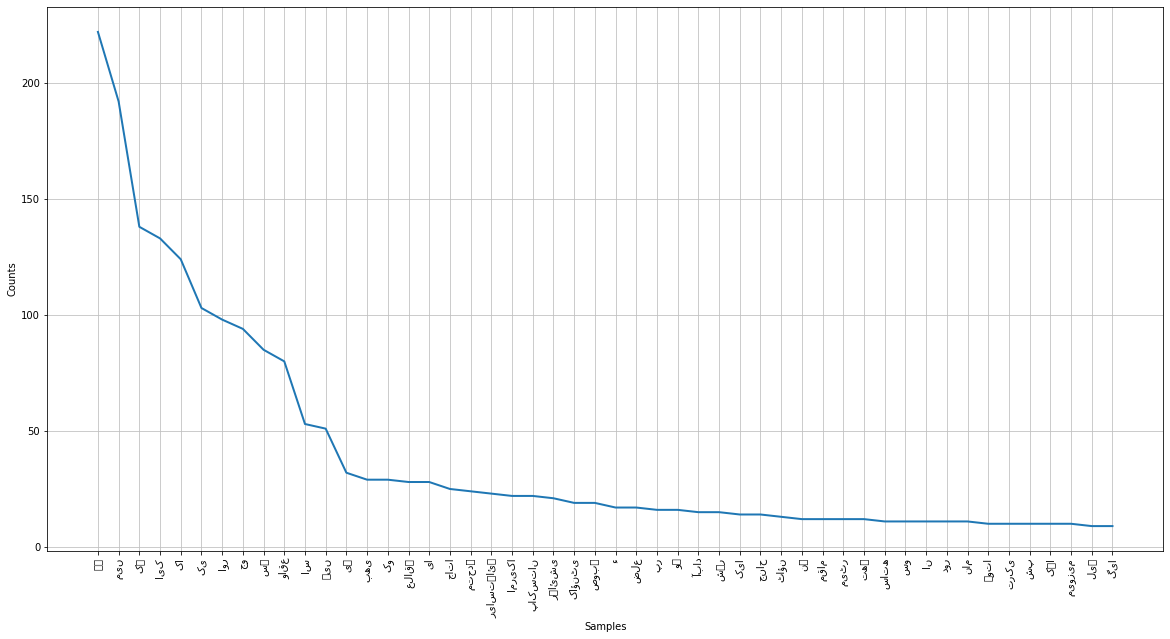

In [19]:
fdist = FreqDist(urdu_words)
plt.figure(figsize=(20, 10))
fdist.plot(50);

In [20]:
urdu_words[:10]

['زیورخ',
 'کیلیفورنیا',
 'ریاستہائے',
 'متحدہ',
 'امریکا',
 'کا',
 'ایک',
 'انانکارپوریٹڈ',
 'علاقہ',
 'جو']

In [21]:
unique_words = np.unique(urdu_words)
unique_word_index = dict((c, i) for i, c in enumerate(unique_words))

In [22]:
unique_word_index

{',': 0,
 ',,': 1,
 ',,,': 2,
 ',,,,': 3,
 '-.': 4,
 '.': 5,
 '،': 6,
 'ء': 7,
 'آئیوس': 8,
 'آئیووا': 9,
 'آئیں': 10,
 'آئے': 11,
 'آباد': 12,
 'آبادی': 13,
 'آبشار': 14,
 'آج': 15,
 'آجاتا': 16,
 'آخری': 17,
 'آرتوین': 18,
 'آزاد': 19,
 'آغاز': 20,
 'آف': 21,
 'آقائے': 22,
 'آل': 23,
 'آلات': 24,
 'آلٹیر': 25,
 'آندھرا': 26,
 'آنے': 27,
 'آوٹ': 28,
 'آٹھ': 29,
 'آٹھویں': 30,
 'آپ': 31,
 'آگے': 32,
 'آہ': 33,
 'آہنگ': 34,
 'آیا': 35,
 'اب': 36,
 'ابتدائی': 37,
 'ابو': 38,
 'ابوالبشر': 39,
 'ابونصر': 40,
 'ابھی': 41,
 'اتحاد': 42,
 'اثر': 43,
 'احباب': 44,
 'احترام': 45,
 'احمد': 46,
 'اخبار': 47,
 'اخبارات': 48,
 'اختصار': 49,
 'اختصاصی': 50,
 'اختیار': 51,
 'اخذ': 52,
 'ادارہ': 53,
 'ادارے': 54,
 'اداکارہ': 55,
 'ارب': 56,
 'ارجنٹائن': 57,
 'اردگرد': 58,
 'ارمنی': 59,
 'ارومچی': 60,
 'از': 61,
 'ازبکستان': 62,
 'ازکابان': 63,
 'اس': 64,
 'استرو': 65,
 'استعمال': 66,
 'اسد': 67,
 'اسرائیل': 68,
 'اسلام': 69,
 'اسلامی': 70,
 'اسلحہ': 71,
 'اسلیم': 72,
 'اسماعیل': 73,
 'اسمبلی': 74,
 'ا

In [23]:
len(unique_word_index)

1474

In [24]:
unique_words[:20]

array([',', ',,', ',,,', ',,,,', '-.', '.', '،', 'ء', 'آئیوس', 'آئیووا',
       'آئیں', 'آئے', 'آباد', 'آبادی', 'آبشار', 'آج', 'آجاتا', 'آخری',
       'آرتوین', 'آزاد'], dtype='<U24')

## Separation of Target and Variables 

In [ ]:
WORD_LENGTH = 3
prev_words = []
next_words = []
for i in range(len(urdu_words) - WORD_LENGTH):
    prev_words.append(urdu_words[i:i + WORD_LENGTH])
    next_words.append(urdu_words[i + WORD_LENGTH])
print(prev_words[:5])
print(next_words[:5])

[['زیورخ', 'کیلیفورنیا', 'ریاستہائے'], ['کیلیفورنیا', 'ریاستہائے', 'متحدہ'], ['ریاستہائے', 'متحدہ', 'امریکا'], ['متحدہ', 'امریکا', 'کا'], ['امریکا', 'کا', 'ایک']]
['متحدہ', 'امریکا', 'کا', 'ایک', 'انانکارپوریٹڈ']


In [ ]:
X = np.zeros((len(prev_words), WORD_LENGTH, len(unique_words)), dtype=bool)
y = np.zeros((len(next_words), len(unique_words)), dtype=bool)
for i, each_words in enumerate(prev_words):
    for j, each_word in enumerate(each_words):
        X[i, j, unique_word_index[each_word]] = 1
    y[i, unique_word_index[next_words[i]]] = 1

In [ ]:
len(X), len(y), X.shape, y.shape

(4372, 4372, (4372, 3, 1465), (4372, 1465))

In [ ]:
# FSM

In [ ]:
model = Sequential()
model.add(LSTM(32, input_shape=(WORD_LENGTH, len(unique_words))))
model.add(Dense(len(unique_words)))
model.add(Activation("softmax"))

optimizer = RMSprop(learning_rate=0.001)
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
history=model.fit(X,y, epochs=100, batch_size=64, validation_split=0.05).history

Epoch 1/100
65/65 [==============================] - 1s 12ms/step - loss: 7.1987 - accuracy: 0.0488 - val_loss: 7.0985 - val_accuracy: 0.0457
Epoch 2/100
65/65 [==============================] - 0s 6ms/step - loss: 6.4841 - accuracy: 0.0510 - val_loss: 6.8224 - val_accuracy: 0.0457
Epoch 3/100
65/65 [==============================] - 0s 6ms/step - loss: 6.0779 - accuracy: 0.0478 - val_loss: 7.0372 - val_accuracy: 0.0457
Epoch 4/100
65/65 [==============================] - 0s 6ms/step - loss: 6.0309 - accuracy: 0.0510 - val_loss: 7.1717 - val_accuracy: 0.0457
Epoch 5/100
65/65 [==============================] - 0s 6ms/step - loss: 5.9964 - accuracy: 0.0507 - val_loss: 7.3630 - val_accuracy: 0.0457
Epoch 6/100
65/65 [==============================] - 0s 6ms/step - loss: 5.9667 - accuracy: 0.0510 - val_loss: 7.4189 - val_accuracy: 0.0457
Epoch 7/100
65/65 [==============================] - 0s 6ms/step - loss: 5.9403 - accuracy: 0.0510 - val_loss: 7.5371 - val_accuracy: 0.0457
Epoch 8/100


Epoch 59/100
65/65 [==============================] - 0s 6ms/step - loss: 4.1998 - accuracy: 0.2580 - val_loss: 8.1038 - val_accuracy: 0.0868
Epoch 60/100
65/65 [==============================] - 0s 6ms/step - loss: 4.1646 - accuracy: 0.2623 - val_loss: 8.1070 - val_accuracy: 0.0913
Epoch 61/100
65/65 [==============================] - 0s 6ms/step - loss: 4.1285 - accuracy: 0.2695 - val_loss: 8.1260 - val_accuracy: 0.0913
Epoch 62/100
65/65 [==============================] - 0s 6ms/step - loss: 4.0932 - accuracy: 0.2736 - val_loss: 8.1434 - val_accuracy: 0.0959
Epoch 63/100
65/65 [==============================] - 0s 6ms/step - loss: 4.0581 - accuracy: 0.2784 - val_loss: 8.1863 - val_accuracy: 0.0959
Epoch 64/100
65/65 [==============================] - 0s 6ms/step - loss: 4.0247 - accuracy: 0.2806 - val_loss: 8.2017 - val_accuracy: 0.0959
Epoch 65/100
65/65 [==============================] - 0s 7ms/step - loss: 3.9922 - accuracy: 0.2883 - val_loss: 8.1852 - val_accuracy: 0.1005
Epoch 

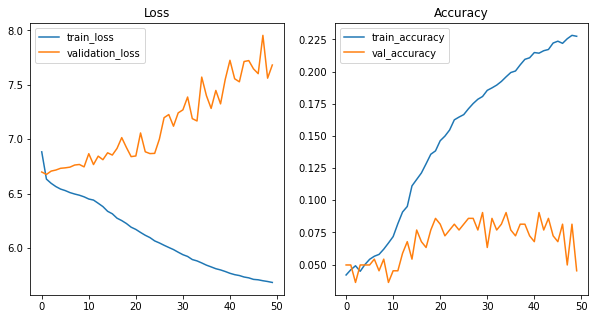

In [ ]:
train_loss = results['loss']
train_acc = results['accuracy']
val_loss =results['val_loss']
val_acc = results['val_accuracy']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.plot(train_loss, label='train_loss')
ax1.plot(val_loss, label='validation_loss')
ax1.set_title("Loss")
ax1.legend()

ax2.plot(train_acc, label='train_accuracy')
ax2.plot(val_acc, label='val_accuracy')
ax2.set_title("Accuracy")
ax2.legend()

# First Model

In [ ]:
import pickle
from keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping
from keras.models import Sequential, load_model
from keras.layers import LSTM
from keras.layers.core import Dense, Activation, Dropout
from keras.optimizers import RMSprop

In [ ]:
model = Sequential()
model.add(LSTM(128, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dropout(0.3))
model.add(Dense(y.shape[1], activation='relu'))
model.add(Activation("softmax"))
print(model.summary())

optimizer = RMSprop(learning_rate=0.001)

model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

early_stop = EarlyStopping(monitor='val_loss', min_delta=1e-2,
                           verbose=1,
                           mode='min', patience=5)


Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_22 (LSTM)               (None, 3, 128)            816128    
_________________________________________________________________
dropout_18 (Dropout)         (None, 3, 128)            0         
_________________________________________________________________
lstm_23 (LSTM)               (None, 128)               131584    
_________________________________________________________________
dropout_19 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 1465)              188985    
_________________________________________________________________
activation_13 (Activation)   (None, 1465)              0         
Total params: 1,136,697
Trainable params: 1,136,697
Non-trainable params: 0
___________________________________________

In [ ]:
results=model.fit(X,y, epochs=100, batch_size=64, validation_split=0.05).history

Epoch 1/100
65/65 [==============================] - 2s 24ms/step - loss: 6.7608 - accuracy: 0.0484 - val_loss: 6.6464 - val_accuracy: 0.0457
Epoch 2/100
65/65 [==============================] - 1s 16ms/step - loss: 6.4770 - accuracy: 0.0429 - val_loss: 6.6434 - val_accuracy: 0.0457
Epoch 3/100
65/65 [==============================] - 1s 15ms/step - loss: 6.4309 - accuracy: 0.0498 - val_loss: 6.6561 - val_accuracy: 0.0457
Epoch 4/100
65/65 [==============================] - 1s 15ms/step - loss: 6.4024 - accuracy: 0.0510 - val_loss: 6.6870 - val_accuracy: 0.0457
Epoch 5/100
65/65 [==============================] - 1s 15ms/step - loss: 6.3772 - accuracy: 0.0474 - val_loss: 6.6953 - val_accuracy: 0.0457
Epoch 6/100
65/65 [==============================] - 1s 15ms/step - loss: 6.3602 - accuracy: 0.0542 - val_loss: 6.7031 - val_accuracy: 0.0365
Epoch 7/100
65/65 [==============================] - 1s 16ms/step - loss: 6.3404 - accuracy: 0.0515 - val_loss: 6.7187 - val_accuracy: 0.0411
Epoch 

65/65 [==============================] - 1s 17ms/step - loss: 5.3928 - accuracy: 0.2690 - val_loss: 7.2188 - val_accuracy: 0.0822
Epoch 59/100
65/65 [==============================] - 1s 17ms/step - loss: 5.3888 - accuracy: 0.2702 - val_loss: 7.5387 - val_accuracy: 0.0731
Epoch 60/100
65/65 [==============================] - 1s 17ms/step - loss: 5.3872 - accuracy: 0.2675 - val_loss: 7.4707 - val_accuracy: 0.0776
Epoch 61/100
65/65 [==============================] - 1s 17ms/step - loss: 5.3705 - accuracy: 0.2702 - val_loss: 7.3497 - val_accuracy: 0.0822
Epoch 62/100
65/65 [==============================] - 1s 17ms/step - loss: 5.3637 - accuracy: 0.2702 - val_loss: 7.3634 - val_accuracy: 0.0868
Epoch 63/100
65/65 [==============================] - 1s 18ms/step - loss: 5.3580 - accuracy: 0.2723 - val_loss: 7.3456 - val_accuracy: 0.0868
Epoch 64/100
65/65 [==============================] - 1s 17ms/step - loss: 5.3538 - accuracy: 0.2721 - val_loss: 7.5928 - val_accuracy: 0.0776
Epoch 65/100

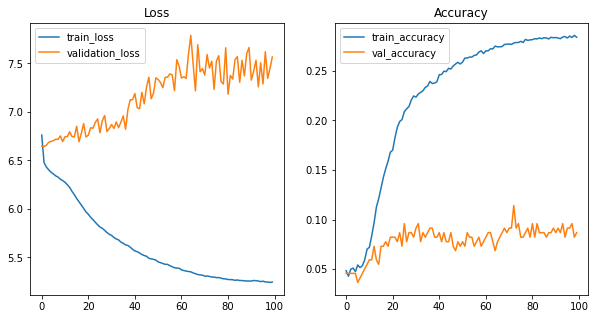

In [ ]:
train_loss = results['loss']
train_acc = results['accuracy']
val_loss =results['val_loss']
val_acc = results['val_accuracy']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.plot(train_loss, label='train_loss')
ax1.plot(val_loss, label='validation_loss')
ax1.set_title("Loss")
ax1.legend()

ax2.plot(train_acc, label='train_accuracy')
ax2.plot(val_acc, label='val_accuracy')
ax2.set_title("Accuracy")
ax2.legend()

# Predictions

In [ ]:
x = np.zeros((1, WORD_LENGTH, len(unique_words)))
text="اور بھی بے"
for t, word in enumerate(text.split()):
    print(word)
    x[0, t, unique_word_index[word]] = 1
print(x)

اور
بھی
بے
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [ ]:
def prepare_input(text):
    x = np.zeros((1, WORD_LENGTH, len(unique_words)))
    for t, word in enumerate(text.split()):
        print(word)
        x[0, t, unique_word_index[word]] = 1
    return x
prepare_input("اور بھی بے")

اور
بھی
بے


array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [ ]:
import heapq
def sample(preds, top_n=3):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)

    return heapq.nlargest(top_n, range(len(preds)), preds.take)

In [ ]:
def predict_completions(text, n=3):
    if text == "":
        return("0")
    x = prepare_input(text)
    preds = model.predict(x, verbose=0)[0]
    next_indices = sample(preds, n)
    return [unique_words[idx] for idx in next_indices]

In [ ]:
q =  input("ENTER TEXT: ")
# print("correct sentence: ",q)
seq =  q #" ".join(q)#tokenized.tokenize(q.lower())[0:3])
print("Sequence: ",seq)
print("next possible words: ", predict_completions(seq, 5))

ENTER TEXT: ساز و سامان
Sequence:  ساز و سامان
ساز
و
سامان
next possible words:  ['کا', '"', 'آئیوس', 'آئیووا', 'آئیں']
